## Basic Overview

In this tutorial we are covering the building blocks of the simetri.graphics as an overview. We will have tutorials for each of these objects and many others that will provide a more in-depth review soon.

# How to import *simetri.graphics*

*simetri.graphics* should be imported as ```import simetri.graphics as sg```.

> [!CAUTION]  
> Never import the library using: 
> - `from simetri import *` 
> - `from simetri.graphics import *`
>
> If you import everything, your namespace will be polluted and debugging will become very difficult.

- **Shape**: Represents a sequence of connected vertices. Currently, only 2D vertices are supported. They can have styling attributes such as line color, line width, fill color, shading etc. 
- **Batch**: Groups multiple *Shape* and/or *Batch* objects. They can be used to manipulate multiple objects at once.
- **BoundaryBox**: Both *Shape* and *Batch* objects have **axis-aligned boundary-boxes** that can be used to specify reference lines and points.
- **Canvas** objects provide a way to render geometry. 
    - They can be used in Jupyter notebooks to display graphics output in output cells (`canvas.display()`) or to create output files in .tex, .pdf, .ps, .eps, .svg, and .png formats `canvas.save(filepath, show=False, overwrite=True)`. 
    - By default `canvas.save` displays the output file in a web-browser, this can be prevented by using `show=False`. 
    - Canvas doesn't overwrite files by default. This behavior can be changed by setting `overwrite=True`.
**LinPath** A path object that combines both linear and curvilinear objects. It can create straight segments, elliptical arcs, cubic and quadratic Bezier curves, Hobby curves, and sine waves. In this tutorial we will only show a few examples. There will be a tutorial dedicated to this subject soon.
**Lace** Interlacing `Shape` objects. In this tutorial we will only show a few examples. There will be a tutorial dedicated to this subject soon.

# Transformations
In addition to these objects, simetri.graphics provides transformation functions that can be used to manipulate the vertices of the Shape objects. These functions include:
- **Translation**: Moves points by a specified distance and direction.
- **Rotation**: Rotates points by a specified angle about a given point.
- **Reflection**: Mirrors points about a given line.
- **Gliding**: First reflects points about a given line and then translates them by a specified distance along the same line.
- **Scaling**: Scales points by a specified factor about a given point.
- **Shearing**: Shears (skews) points by a specified factor about a given axis.

These transformations can be applied individually or combined to create complex transformations.



## Creating Shape Objects

*Shape* objects can be created by passing a list of vertices to the *Shape* constructor. They can be closed or not, they are open by default unless the given first and last points are congruent. For example, to create a triangle with vertices at (0, 0), (50, 0), and (0, 50), you can use the following code:

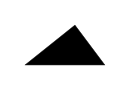

In [47]:
import simetri.graphics as sg

canvas = sg.Canvas()
triangle = sg.Shape(points=[(0, 0), (50, 40), (80, 0)], closed=True)
canvas.draw(triangle)

# canvas.save('/home/nikolai/designs/triangle.pdf', show=False, overwrite=True)
canvas.display()


### Notes:

- We should import the library using `import simetri.graphics as sg`.
- If we don't explicitly specify that a shape is closed or define the same coordinate for the first and last vertex, the library will assume that it is not closed.
- If we don't specify any cosmetic attributes, the library will use default values.
- *Canvas* objects will generate an appropriately sized output if we do not specify the size. There is no default size but there are default margins, background color, and blending modes.
- The units by default are in points (1 inch = 72 points).
- The recommended segment size is between 10 and 500. Very small and very large dimensions can create problems with tolerances.
- All angles and rotations are in radians. Counterclockwise positive.
- The origin is at the bottom left corner of the canvas.
- The x-axis increases to the right and the y-axis increases upwards.

- `canvas.display()` is usually the last line of the scripts.
- Opening a web-browser can be prevented by `show=False` argument in `canvas.save`. Default is `True`.
- Files can be overwritten if they exist by `overwrite=True`. Default is `False`.

# Modifiying the triangle's points

Shape objects behave like lists, so we can modify them in place by using list indexing and slicing. 

((100.0, 50.0), (170.0, 40.0), (200.0, 0.0))


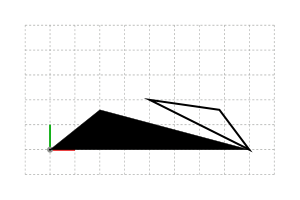

In [ ]:
import simetri.graphics as sg

canvas = sg.Canvas()
canvas.help_lines(pos=(-25, -25), width=250, height=150)

triangle = sg.Shape(points=[(0, 0), (50, 40), (80, 0)], closed=True)

triangle[-1] = (200, 0)  # Change the last point to (200, 0)
canvas.draw(triangle)

triangle[:2] = [(100, 50), (170, 40)]  # Change the first two points to (0, 0) and (50, 40)
canvas.draw(triangle, fill=False, line_width=2)

print(triangle.vertices)
# triangle.vertices[0] = (10, 20)  # This would raise an error. Vertices are read-only.
canvas.display()

### Notes:

- `triangle.vertices` is a computed property. 
- Same object can be drawn multiple times. At each drawing, Canvas takes a snapsot of the drawn object.
- Canvas can draw an object with different cosmetic properties without modifying the object itself.
- `canvas.help_lines()` shows a grid and the Canvas coordinate system.

### Transforming Shapes

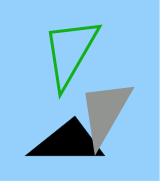

In [ ]:
import simetri.graphics as sg

canvas = sg.Canvas(back_color=sg.light_blue)
triangle = sg.Shape([(0, 0), (50, 40), (80, 0)], closed=True)
triangle2 = triangle.copy()
triangle3 = triangle.copy()
triangle2.translate(dx=70, dy=0).rotate(angle=sg.pi/3)
# rotations are about the origin by default
triangle3.rotate(angle=sg.pi/3).translate(dx=70, dy=0)
canvas.draw(triangle)
canvas.draw(triangle2, fill=False, line_width=3, line_color=sg.green)
canvas.draw(triangle3, stroke=False, fill_color=sg.gray, line_width=3)

canvas.display()

### Notes:
    
- All angles in *simetri.graphics* are specified in radians.
- Style attributes can be overwritten by the *canvas.draw* method.
- Transformations can be chained together.
- Order of transformations may matter. Translation then rotation may be different from rotation then translation.
- Rotations are about the origin by default. A roto-center can be specified by using the `about=(x, y)` argument.
- If the `stroke == False` then the *line_width* doesn't matter.
- Canvas size is automatically computed unless it is explicitly stated.
- The order of *canvas.draw* calls matters if the objects overlap. There is no `z_order` property yet.

# Batch objects

`Batch` objects are used for grouping multiple objects together and manipulating them at once. Some of the characteristics of Batch objects are:

- The objects they contain are called `elements`.
- Their elements are ordered.
- They can contain other `Batch` objects as well. 
- They can be transformed like the `Shape` objects.
- Transformations are applied to the `Shape` objects in them.
- They do not have a position (but their bounding-boxes do), orientation, or any cosmetic features. They are just containers.
- They do have bounding-boxes that are formed by the combination of the `Shape` objects they contain.
- They can be used to set the properties of their elements by using `batch.set_attributes(name, value)`

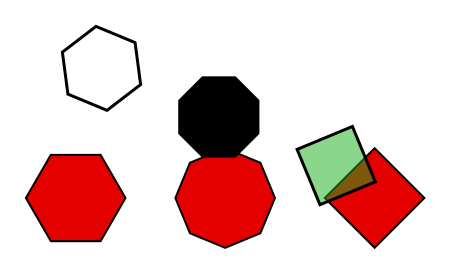

In [ ]:
import simetri.graphics as sg

canvas = sg.Canvas()

hex = sg.reg_poly_shape(pos=(0, 0), n=6, r=50)
oct = sg.reg_poly_shape(pos=(150, 0), n=8, r=50)
sqr = sg.reg_poly_shape(pos=(300, 0), n=4, r=50)

shapes = sg.Batch([hex, oct, sqr])

canvas.draw(shapes, fill_color=sg.red, line_width=2)

shapes.rotate(-sg.pi/8, about=(400, 0)).scale(.85)
shapes.set_attribs('line_width', 3) # set all line widths to 3
shapes[0].fill=False
shapes[-1].fill_color = sg.green # set the last shape's fill color to green
shapes[-1].alpha = 0.5

canvas.draw(shapes)

canvas.display()

# Bounding boxes
[<img alt="bounding_box" src="images/bounding_box.png" />]


### Transformations with Repetitions

Any transformation can be applied successively. This returns a new *Batch* object populated with the transformed copies of the target object. A transformation with zero repetitions modify the `Shape` object while a transformation with repetitions more than zero does not modify the transformed `Shape`, it creates transformed copies of it and then returns a `Batch` object with the original and the transformed shapes in it. `reps=2` returns a batch with 3 elements in it. The original shape and two transformed copies of it.

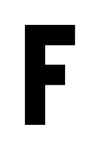

In [ ]:
import simetri.graphics as sg

canvas = sg.Canvas()

F = sg.letter_F()

F.translate(dx=70, dy=0, reps=3)

canvas.draw(F)

canvas.display()

This is not a bug! The translation with `reps=3` returned a `Batch` object with 4 shapes in it, but we didn't catch it. The script below shows the difference. This is a common mistake that everybody makes.

> [!IMPORTANT]
> Transformations with repetitions return a `Batch` object with the unmodified original shape and transformed copies of it.

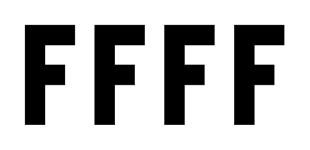

In [ ]:
import simetri.graphics as sg

canvas = sg.Canvas()

F = sg.letter_F()

letters = F.translate(dx=70, dy=0, reps=3)

canvas.draw(letters)
canvas.display()

If we transform a `Batch` object with multiple repetitions then the transformed shapes are appended in the same batch. So we do not need to catch this. It is important to keep track of the shapes vs batches.

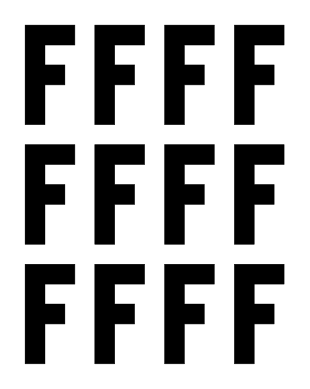

In [ ]:
import simetri.graphics as sg

canvas = sg.Canvas()

F = sg.letter_F()

letters = F.translate(dx=70, dy=0, reps=3)
letters.translate(dx=0, dy=120, reps=2)

canvas.draw(letters)
canvas.display()

> [!IMPORTANT]
> Transforming a `Batch` object with repetitions "grow" the same batch.
> Since the returned `Batch` already exists, you do not need to catch the returned Batch.

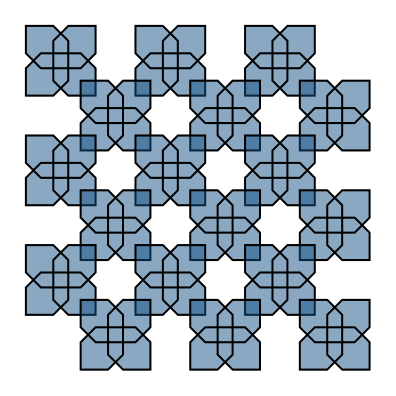

In [ ]:
import simetri.graphics as sg

canvas = sg.Canvas()

points = [(-15, 0), (-15, 40), (15, 70), (70, 70)]

shape = sg.Shape(points)
pattern = shape.mirror([(0, 0), (10, 10)], reps=1).rotate(sg.pi/2, reps=3)
pattern.translate(220, 0, reps=2).translate(110, -110, reps=1)
pattern.translate(0, -220, reps=2)

canvas.draw(pattern.merge_shapes().scale(.5), line_width=2, fill_color=sg.light_navy, alpha=0.5)
canvas.display()

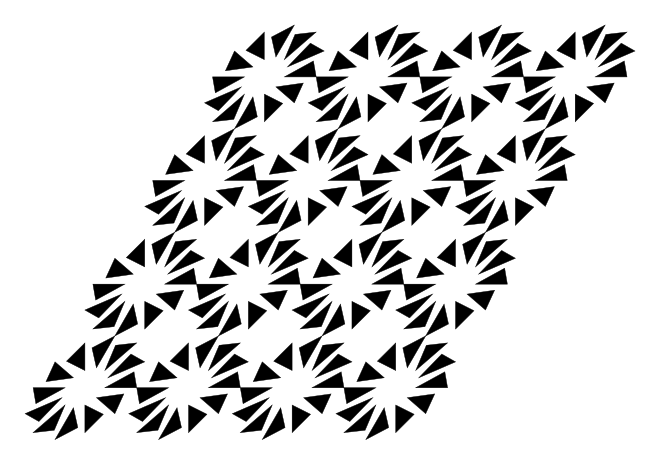

In [ ]:
import simetri.graphics as sg

canvas = sg.Canvas()
triangle = sg.Shape([(50, 0), (100, 40), (130, 0)], closed=True)
triangles = triangle.rotate(sg.pi/6, reps=11).translate(dx=260, reps=3)
canvas.draw(triangles.translate(dy=260, reps=3).scale(.4).shear(sg.pi/6, 0))
canvas.display()


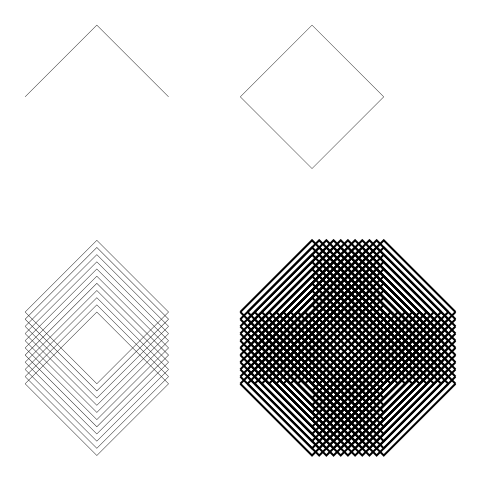

In [ ]:
import simetri.graphics as sg

canvas = sg.Canvas()
canvas.scale(72)
n = 8
points  = [(0, 0), (1, 1), (2, 0)]
kernel = sg.Shape(points)
canvas.draw(kernel)
canvas.translate(3, 0)
petal = kernel.mirror(sg.axis_x, reps=1)
canvas.draw(petal)
canvas.translate(-3, -4)
petal.translate(dy=.1, reps=10)
canvas.draw(petal)
canvas.translate(3, 0)
petal.translate(dx=.1, reps=10)
canvas.draw(petal, line_width=2)

canvas.display()

### Notes:

- Transformations with repetitions do not alter the target object. A new *Batch* object with the target object and multiple transformed copies of the target object gets created.
- *Batch* objects can modify all its elements via `batch.set_attribs` method.
- Drawing a *Batch* object is equivalent to drawing its elements individually.


## Composite Transformations

All individual transformations can be combined with each other. When we combine transformations the order may matter. The transformations are applied from left to right.

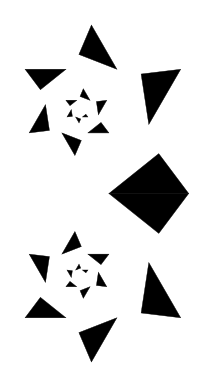

In [ ]:
import simetri.graphics as sg

canvas = sg.Canvas()
triangle = sg.Shape([(0, 0), (50, 40), (80, 0)], closed=True)

translate = sg.translation_matrix(dx=100, dy=0)
rotate = sg.rotation_matrix(sg.pi/3)
scale = sg.scale_matrix(scale_x=.8, scale_y=.8)
comp_transform = translate @ rotate @ scale

triangles = triangle.transform(comp_transform, reps=12)

canvas.draw(triangles.mirror(triangles.bottom, reps=1))

canvas.display()

# Interlaced designs

Closed or open shapes can be interlaced. We will have a tutorial exploring this topic soon.

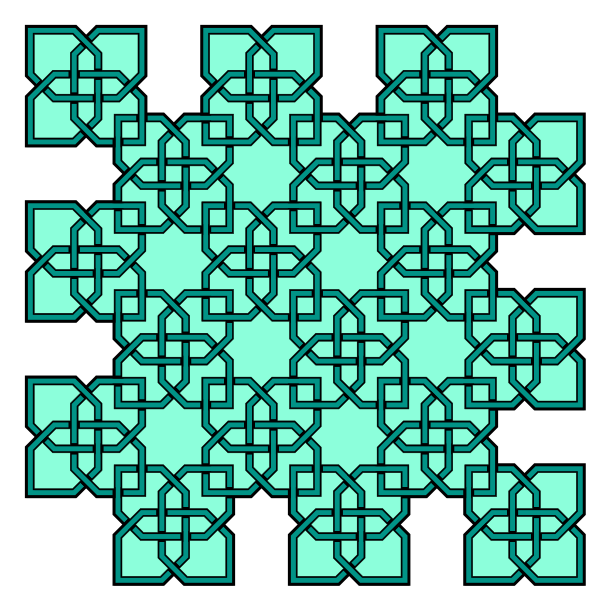

In [ ]:
import simetri.graphics as sg

canvas = sg.Canvas()

points = [(-15, 0), (-15, 40), (15, 70), (70, 70)]

shape = sg.Shape(points)
pattern = shape.mirror([(0, 0), (10, 10)], reps=1).rotate(sg.pi/2, reps=3)
pattern.translate(220, 0, reps=2).translate(110, -110, reps=1)
pattern.translate(0, -220, reps=2)

lace = sg.Lace(pattern.scale(.8), offset=4)
for plait in lace.plaits:
    canvas.draw(plait, fill_color=sg.teal, line_width=3)

for frag in lace.fragments:
    canvas.draw(frag, fill_color=sg.light_aqua)


canvas.display()

# Star objects

Star objects are based on Islamic geometric patterns. There will be a dedicated tutorial for this topic.

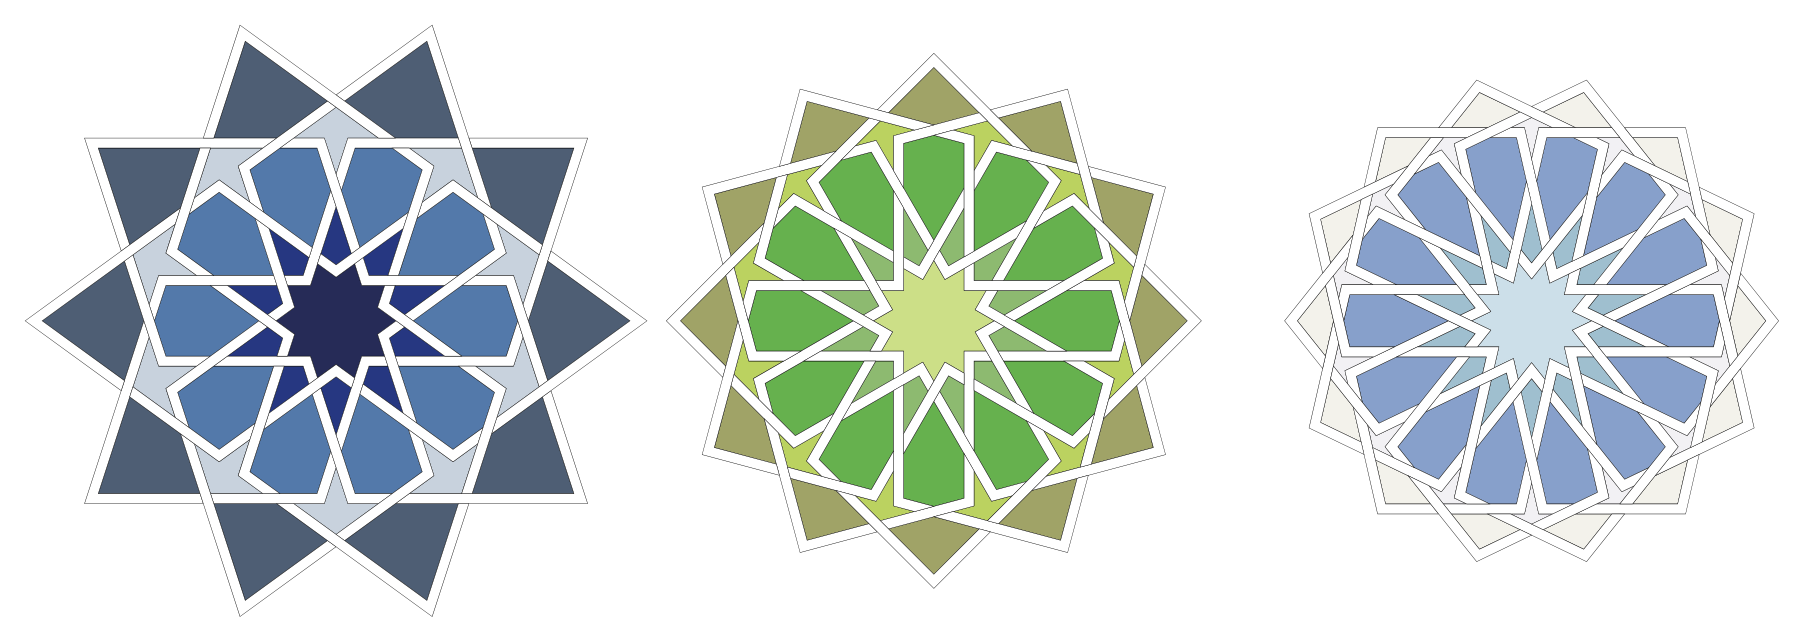

In [ ]:
import simetri.graphics as sg

canvas = sg.Canvas()
Star = sg.stars.Star
radius = 50
gap = 300
for  i in range(10, 15, 2):
    star = Star(i, radius).level(4)
    star.translate(i * gap, 0)
    swatch = sg.random_swatch()
    lace = sg.Lace(star, offset=5,
                    swatch=swatch)

    canvas.draw(lace)

canvas.display()

# LinPath path objects

`LinPath` objects can have straight or curved section attached together. They are very flexible and can create intricate shapes. Some of the path operations are performed by using the path object's position and angle and the provided argument values.

The list of path operations:

- `path.forward(dist)` Straight line along the path's angle.
- `path.h_line(dist)` Horizontal line, regardless of position and angle.
- `path.v_line(dist)` Vertical line, regardless of position and angle.
- `path.line_to(point)` A line between the path's position and the given point. The given point becomes the path's new position now.
- `path.move_to(point) No line drawn. Path's position changes to the given point and path's angle is the line angle of the path's position and the given point.
- `path.r_line(dx, dy)` Relative line. A line drawn to the path's new position (`(path.pos[0] + dx, path.pos[1] + dy)`)
- `path.r_move(dx, dy)` Relative move. Path's position becomes `(path.pos[0] + dx, path.pos[1] + dy)`
- `path.segments(points)` Add a series of line segments formed by the given points.
- `path.cubic_to(control1, control2, end)` Add a cubic Bézier curve defined with two control points, path's current position and the end point to the path. 
- `path.quad_to(control, end)` Add a quadratic Bézier curve defined with a control point, path's current position and the end point to the path.
- `path.hobby_to(points)` Add a Hobby curve through the given points.
- `path.blend_cubic(control1_length, control2, end)` Blend a cubic Bézier curve.
- `path.blend_quad(control_length, end)` Blend a quadratic Bézier curve.
- `path.arc(radius_x, radius_y, start_angle, span_angle, rot_angle)` Add an elliptical arc.
- `path.blend_arc(radius_x, radius_y, start_angle, span_angle, sharp=False)` Add an blended elliptical arc.
- `path.sine(period, amplitude, duration, phase_angle, rot_angle, damping)` Add a sine wave.
- `path.blend_sine(period, amplitude, duration, phase_angle, damping)` Add a blended sine wave.
- `path.close()` Close the path.
- `path.push()` Push the stack. Path's position and angle are added to Path's stack.
- `path.pop()` Pop the stack. Path's position and angle are updated from the Path's stack.

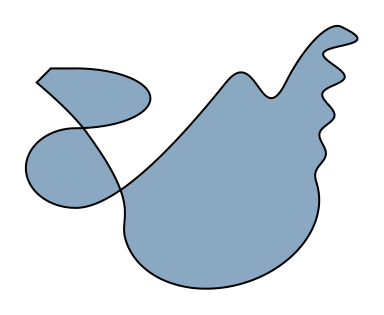

In [45]:
import simetri.graphics as sg

canvas = sg.Canvas()
path = sg.LinPath()

path.angle = sg.pi/4
path.forward(40)
path.h_line(50)
path.blend_arc(radius_x=150, radius_y=60, start_angle=sg.pi/2, span_angle=-sg.pi)
path.blend_arc(radius_x=100, radius_y=80, start_angle=sg.pi/2, span_angle=sg.pi)
path.blend_quad(100, (380, 0))
path.blend_cubic(100, (450, -100), (500, 0))
path.blend_arc(radius_x=150, radius_y=50, start_angle=3*sg.pi/2, span_angle=-sg.pi/2)
path.blend_sine(amplitude=40, period=80, duration=320, phase=sg.pi/2, damping=.006)
path.blend_arc(radius_x=150, radius_y=200, start_angle=sg.pi/2, span_angle=-sg.pi)
path.blend_cubic(50, path.r_coord(50, 50), (100, -100))
path.blend_quad(50, (0, 0))

canvas.draw(path.scale(.5), line_width=2, fill_color=sg.light_navy, alpha=0.5)

canvas.display()

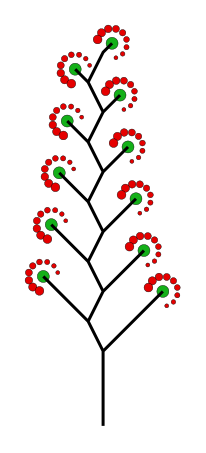

In [ ]:
from math import copysign

import simetri.graphics as sg

def flower(radius, canvas, path):
    canvas.circle(path.pos, 6, fill_color=sg.green)
    angle = sg.pi/6
    for i in range(9):
        x, y = path.r_polar(radius, (i*angle) - angle)[:2]
        canvas.circle((x, y), 2+i*.3, fill_color=sg.red)

canvas = sg.Canvas()
dim = 15
path = sg.LinPath()
path.forward(5 * dim)
path.push()
path.r_line(4 * dim, 4 * dim)
flower(dim, canvas, path)
dist = 3 * dim
for i in range(10):
    path.pop()
    sign = copysign(1, i%2 - 0.5) # -1 if i%2 else 1
    path.r_line(dim * sign , 2 * dim)
    path.push()
    delta = 4 * i
    path.r_line(sign * (dist - delta), dist - delta)
    flower(dim, canvas, path)

canvas.draw(path, line_width=3)
canvas.display()

Final Position: (0.0, 0.0):
Final Angle: -139.9: degrees.


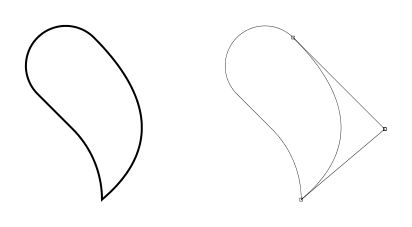

In [ ]:
import simetri.graphics as sg

canvas = sg.Canvas()

path = sg.LinPath() # Start a new path at the origin, pointing up.
path.arc(radius_x=100, radius_y=100, start_angle=0, span_angle=sg.pi/4 )
path.forward(50)
path.blend_arc(radius_x = 40, radius_y = 40, start_angle = sg.pi/4, span_angle = -sg.pi)
path.blend_quad(control_length=130, end=(0, 0))

canvas.draw(path, fill=False, line_width=2)
x, y = path.pos[:2]
print(f"Final Position: ({x:.1f}, {y:.1f}):\nFinal Angle: {sg.degrees(path.angle):.1f}: degrees.")


canvas.translate(200, 0)

# Draw the bezier handles.
canvas.draw(path, fill=False, handles=True)
canvas.display()

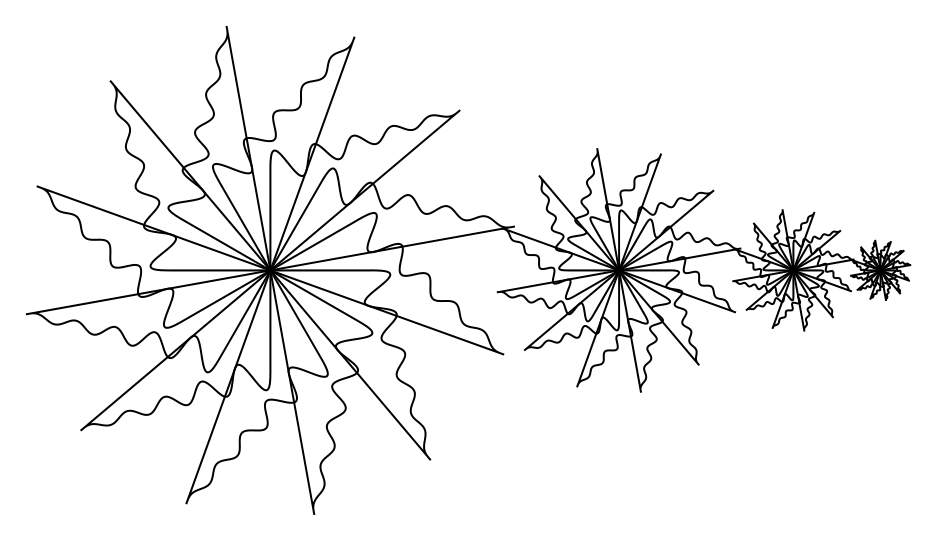

In [ ]:
import simetri.graphics as sg

canvas = sg.Canvas()

path = sg.LinPath()
path.forward(100)

path.blend_sine(duration=200, damping=.01)
path.close()

transform = sg.scale_matrix(.5) @ sg.translation_matrix(350, 0)

paths = path.rotate(sg.pi/6, reps=11)
paths.transform(transform, reps=3)
canvas.draw(paths, line_width=2, fill=False)

canvas.display()

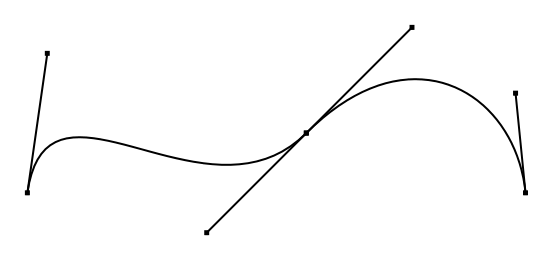

In [ ]:
import simetri.graphics as sg

canvas = sg.Canvas()

path = sg.LinPath(line_width=2)
path.cubic_to(control1=(20, 140), control2=(180, -40), end=(280, 60))
path.blend_cubic(control1_length=150, control2=(490, 100), end=(500, 0))

canvas.draw(path, handles=True)
canvas.display()

<video controls src="Squares2.mp4" title="Title"></video>